In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('customer_booking.csv', encoding="latin-1")

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le1 = LabelEncoder()

In [15]:
x = df[['sales_channel','trip_type','flight_day','route','booking_origin']]

In [17]:
x.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [39]:
df['sales_channel'] = le1.fit_transform(df['sales_channel'])
df['trip_type'] = le1.fit_transform(df['trip_type'])
df['flight_day'] = le1.fit_transform(df['flight_day'])
df['route'] = le1.fit_transform(df['route'])
df['booking_origin'] = le1.fit_transform(df['booking_origin'])



In [41]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [43]:
x = df.drop('booking_complete', axis =1 )

In [45]:
y = df.booking_complete

In [113]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify=y)

In [117]:
len(x_train)

40000

In [119]:
len(x_test)

10000

In [121]:
from sklearn.linear_model import LinearRegression

In [123]:
l_reg = LinearRegression()

In [125]:
l_reg.fit(x_train,y_train)

LinearRegression()

In [127]:
l_reg.score(x_test,y_test)

0.0378913595882745

In [129]:
from sklearn.linear_model import LogisticRegression

In [131]:
l_lo = LogisticRegression()

In [133]:
l_lo.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
l_lo.score(x_test,y_test)

0.8504

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
tr = DecisionTreeClassifier()

In [141]:
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [143]:
tr.score(x_test,y_test)

0.7862

In [164]:
y_predict = ran.predict(x_test)

In [166]:
from sklearn.metrics import confusion_matrix

# Example usage:
cm = confusion_matrix(y_test, y_predict)
cm


array([[8371,  133],
       [1329,  167]], dtype=int64)

In [168]:
from sklearn.metrics import classification_report

# y_test: your true labels
# y_pred: your predicted labels (from your model)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.56      0.11      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



In [158]:
from sklearn.ensemble import RandomForestClassifier


In [160]:
ran =RandomForestClassifier()
ran.fit(x_train,y_train)

RandomForestClassifier()

In [162]:
ran.score(x_test,y_test)

0.8538

In [170]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Compute MI scores
mi_scores = mutual_info_classif(x, y)

# Convert to pandas Series for easy viewing
mi_series = pd.Series(mi_scores, index=x.columns)
mi_series = mi_series.sort_values(ascending=False)

print(mi_series)


route                    0.054214
booking_origin           0.044120
flight_duration          0.017347
wants_extra_baggage      0.011085
length_of_stay           0.007162
trip_type                0.006834
wants_in_flight_meals    0.005417
num_passengers           0.003366
purchase_lead            0.003063
wants_preferred_seat     0.002996
sales_channel            0.002440
flight_hour              0.002052
flight_day               0.000592
dtype: float64


In [172]:
mi_series

route                    0.054214
booking_origin           0.044120
flight_duration          0.017347
wants_extra_baggage      0.011085
length_of_stay           0.007162
trip_type                0.006834
wants_in_flight_meals    0.005417
num_passengers           0.003366
purchase_lead            0.003063
wants_preferred_seat     0.002996
sales_channel            0.002440
flight_hour              0.002052
flight_day               0.000592
dtype: float64

C:\Users\soham\AppData\Local\Temp\ipykernel_23248\2441533900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')


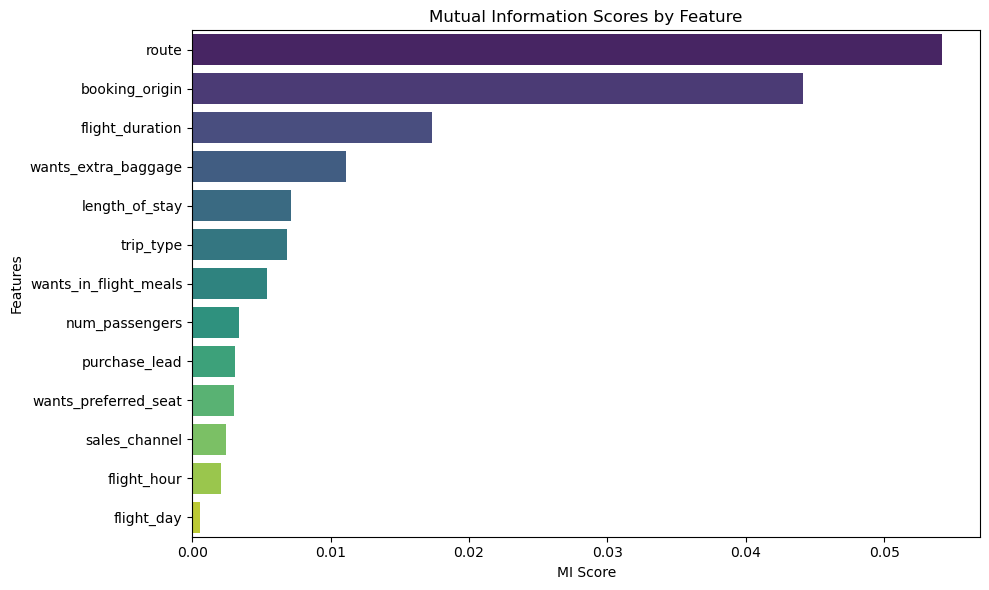

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')

plt.title('Mutual Information Scores by Feature')
plt.xlabel('MI Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()